In [11]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, \
                            accuracy_score, \
                            precision_score, \
                            recall_score, \
                            f1_score

In [12]:
data = pd.read_excel("AirQualityUCI.xlsx")
df = pd.DataFrame(data)

In [13]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [14]:
# statistics of the data
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [15]:
df.replace(to_replace= -200, value= np.NaN, inplace= True)
df = df.dropna()

In [16]:
# df = df.drop(columns=['Date', 'Time'], axis= 1)
used_df = df[['NMHC(GT)', 'RH']]
used_df = used_df.to_numpy()
used_df

array([[150.        ,  48.87500095],
       [112.        ,  47.69999981],
       [ 88.        ,  53.97500038],
       ...,
       [212.        ,  66.10000038],
       [275.        ,  66.875     ],
       [275.        ,  66.75000191]])

In [17]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(used_df)

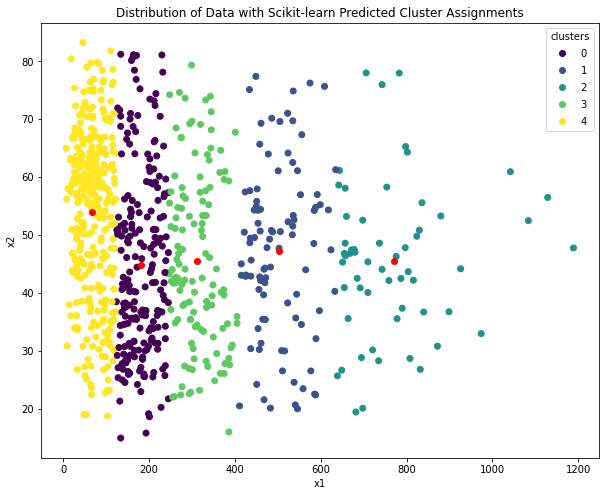

In [18]:
# Buat model KMeans
clt = KMeans(n_clusters=5, max_iter=300, random_state=0)

# Cocokkan model dengan data
clt.fit(used_df)

# Cluster centers
centers = clt.cluster_centers_
y = clt.labels_

# Dapatkan prediksi
y_pred = clt.predict(used_df)

# # Make labels discrete 
y_pred = y_pred.astype(int)

# Dapatkan prediksi sentroid
centers_pred = clt.cluster_centers_

# Visualisasikan prediksi
fig, ax    = plt.subplots(figsize=(10,8))
sc         = ax.scatter(used_df[:,0],used_df[:,1],c=y_pred)
sc_centers = ax.scatter(centers_pred[:,0],centers_pred[:,1],c='r')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Distribution of Data with Scikit-learn Predicted Cluster Assignments')
ax.legend(*sc.legend_elements(), title='clusters')
plt.show()

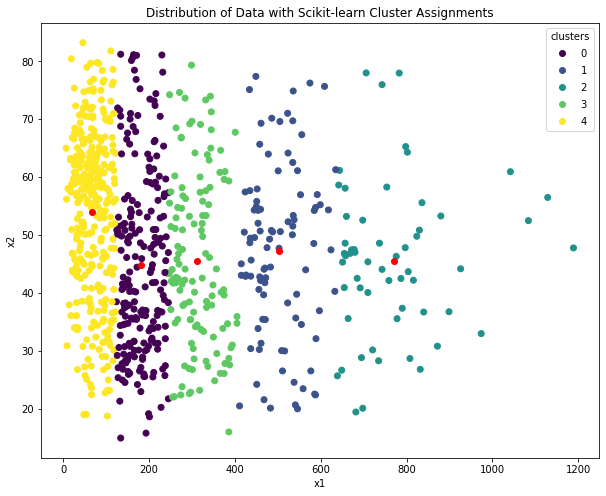

In [19]:
# Visualisasikan prediksi
fig, ax    = plt.subplots(figsize=(10,8))
sc         = ax.scatter(used_df[:,0],used_df[:,1],c=y_pred)
sc_centers = ax.scatter(centers[:,0],centers[:,1],c='r')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Distribution of Data with Scikit-learn Cluster Assignments')
ax.legend(*sc.legend_elements(), title='clusters')
plt.show()

In [20]:
# Seberapa akurat estimasi sentroid yang dihasilkan?
print(f'The mean absolute error between the predicted and true centroids is: {mean_absolute_error(centers,centers_pred[[2,1,0,3,4]])}')

# Kalibrasikan pelabelan (if needed)
idx_0         = y_pred == 0
idx_1         = y_pred == 1
idx_2         = y_pred == 2
idx_3         = y_pred == 3
idx_4         = y_pred == 4
y_pred[idx_0] = 2
y_pred[idx_1] = 1
y_pred[idx_2] = 0
y_pred[idx_3] = 3
y_pred[idx_4] = 4

acc = accuracy_score(y.round(), y_pred)
pre = precision_score(y.round(), y_pred, average='weighted') 
rec = recall_score(y.round(), y_pred, average='weighted')
f1 = f1_score(y.round(), y_pred, average='weighted')
print(f'Accuracy score: {acc:.4f}')
print(f'Precision score: {pre:.4f}')
print(f'Recall score: {rec:.4f}')
print(f'F1 score: {f1:.4f}')

The mean absolute error between the predicted and true centroids is: 118.0917483727867
Accuracy score: 0.6723
Precision score: 0.6723
Recall score: 0.6723
F1 score: 0.6723
